In [2]:
pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install pyreadr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 364 kB 4.0 MB/s 


In [20]:
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
import plotnine as p
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import statsmodels.api as sm  
from itertools import combinations 
import plotnine as p
from statsmodels.iolib.summary2 import summary_col
import pyreadr


# Pregunta 1: Instrumental Variables (IV)

## Identifique todos los elementos necesarios para implementar un enfoque de IV.

El método de Variables Instrumentales permite estimar el efecto de una variable de interés sobre la variable dependiente a partir de un instrumento que juegue el rol de dicha variable de interés sin tener el problema de endogeneidad. Dicho instrumento o variable instrumental no pertenece en sí a la ecuación explicativa, se correlaciona con las variables endógenas y condicionada a las otras variables. En este sentido, al usar la asignación aleatoria al tratamiento en lugar del tratamiento del mundo real, dicho método se emplea en casos donde tenemos un problema de sesgo o no podemos identificar limpiamente el efecto de una variable causal sobre otra.

En este caso, en principio, el número de horas que una persona usa para ver televisión de niño (Z) es un instrumento válido para la variable educación (X). Sin embargo, para sostener dicha afirmación, se comprobarán los dos supuestos fundamentales para implementar un enfoque de IV.


#### El supuesto de relevancia:

Este supuesto implica que el instrumento está correlacionado con la variable educación (es decir, tiene una correlación distinta a 0) ya sea positiva o negativamente y, por ende, explica algo de la variabilidad de (X). La relevancia nos permite ver los supuestos de identificación y uso de variables instrumentales de manera más segura para así saber que 'z' (el instrumento) realmente se relaciona con 'x' (el tratamiento). De esta manera, se busca que las variables instrumentales funcionen para evitar problemas de endogeneidad: que la variable independiente se correlacione con el término de error en una regresión. En este caso, el supuesto de relevancia es fácil de probar puesto que la correlación entre nuestra variable instrumental y educación es algo intuible y debería ser alta: la cantidad de tiempo que un niño pasa viendo la TV es excluyente con la cantidad de tiempo o esfuerzo que le puede dedicar a sus estudios. 

#### El supuesto de validez: 

Este supuesto implica que cualquier camino entre el instrumento y el resultado debe pasar por el tratamiento o cerrarse, trasladando la responsabilidad de cerrar todos los posibles backdoors hacia el instrumento. Introspectivamente, parece que se cumple la condición de exogeneidad del instrumento en tanto que el instrumento (Z) tiene una correlación de cero con el nivel de ingresos (Y). Es decir, no tiene efecto parcial en dicha variable y no debería estar correlacionada con alguna otra variable omitida. Ello dado que, de manera directa, parece poco lógico demostrar que existieran variables omitidas (ya sea por no ser observables o medibles) que, a través de la cantidad de horas que una persona vió televisión durante su infancia, puedan afectar el nivel de ingresos. En la práctica, dicha cantidad de horas no es un criterio que se tome en cuenta para asignar un salario. 

## Explique el procedimiento para encontrar el efecto causal en este escenario. Puede usar ecuaciones. 


Lo que buscamos es la relación "Z →  X →  Y" y que el procedimiento se realice de manera aislada para evitar la presencia de variables omitidas o sesgos de manera que se pueda identificar el efecto causal "X → y". Para ello, se utilizó una variable instrumental (número de horas que una persona utilizó para ver televisión cuando era niño) de manera que podeamos identificar una relación causal entre educación → nivel de ingresos. Como ya se comprobó previamente, se cumplen los dos supuestos fundamentales y, por ende, se puede afirmar que existe una correlación entre el instumento y educación "Z →  X" y que no hay correlación alguna entre el instrumento y el nivel de ingresos "Z →  Y". Por ende, se afirma que no hay ninguna conexión con U (error o variable omitida) que afecte a Z o X o Y. 


## ¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación

De manera intuitiva, el efecto de la educación sobre el nivel de ingresos es positivo en tanto que, aparentemente, el gasto en educación es una forma de inversión de capital humano. Particularmente, de capital académico e intelectual a nivel personal. En este sentido, dado que el nivel de ingreso suele estar relacionado con la complejidad de las funciones requeridas en un determinado puesto del proceso productivo, los individuos con mayor educación que puedan alcanzar dichos puestos con requisitos altos tenderán a obtener un mayor ingreso. Sin embargo, para sostener que esta relación es causal, debemos aislar la co-variación entre el tratamiento y el resultado que se debe al tratamiento y eliminar por completo la variación producto de posibles backdoors (factores externos no medibles u observables que puedan influir).

Por ende, en caso se corra un modelo de regresión lineal, existe la posibilidad de que se presente un problema de endogeneidad o de sesgo por variables omitidas en la relación entre variables planteadas. En este sentido, si bien se podría llegar a identificar una correlación, no sería posible afirmar que ello sea una relación causal (pueden haber otros factores detrás que están explicando la correlación). Sin embargo, a partir de una regresión empleando la variable instrumental planteada en este ejercicio, es posible hablar de inferencias causales. Ello dado que se usa el concepto de experimentos aleatorios controlados y, por ende, solucionan el problema de endogeneidad y el sesgo por variables omitidas. Así, sólo aislando de esa manera todos los demás efectos que podrían estar causando o afectando la variable dependiente, es posible afirmar que ello es en efecto una relación causal entre las variables planteadas (educación -> nivel de ingresos). 


# Pregunta 2: Regression Discontinuity Design (RDD)

## Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo.

La regresión discontinua (RDD) es un diseño cuasi-experimental que nos permite poder realizar inferencias causales en ausencia de la aleatorización al determinar los efectos causales de intervenciones mediante la asignación de un punto de corte/umbral por encima o por debajo del asignado. En este caso, se investiga la entrega de becas para estudiantes a partir de la asignación de un valor de corte: tener un promedio superior durante la secundaria igual a 16. Existen tres elementos necesarios para implementar un RDD:

#### Running Variable:

Primero, debemos ver el tipo de variable que vamos a estudiar, la cual se denomina running variable. En este caso, la variable de ejecución es el promedio final en secundaria de los alumnos en tanto que esta determina si un estudiante recibirá la beca. 

#### Cut off: 

Segundo, debemos tener un cut off o punto de corte. En este caso, este punto de corte determinará si se pertenece al grupo de tratamiento (es decir, si se recibe la beca) o no: si se tiene un promedio igual o superior a 16 son candidatos para recibir la beca; caso contrario, no son tomados en cuenta.

#### Bandwidth: 

Tercero, debemos tener el bandwidth o ancho de la banda,  el cual es el intervalo de elementos que vamos a estudiar y que se desea considerar comparable. En este caso, se podría pensar que los estudiantes con promedios cercanos a 16 son similares. Sin embargo, va a depender del investigador y de la distancia entre los promedios dado que pueden haber personas que se encuentren más lejos del promedio asignado o haber mayor variación por razones distintas al punto de corte. 

#### Además

Se comprueba la continuidad de la variable de ejecución en tanto que toda discontinuidad implica necesariamente alguna causa. Asimismo, la regla de asignación del punto de corte resulta objetiva y no manipulada dado que esta fue propuesta con tiempo de anticipación por el PRONABEC. 

## Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.

El efecto de tratamiento del RDD que nos permitirá encontrar el efecto causal se dará en tanto cuanto varía el valor determinado en función de nuestro punto de corte, es decir, cuanto cambia  el otorgamiento de becas en función del promedio. Posteriormente, tendríamos dos grupos: tratamiento, que son aquellos que cumplen con la condición; y control, aquellos que no cumplen con la condición. Finalmente, se estima el efecto del tratamiento restando la media del grupo de tratamiento con la media del grupo de control. De este ejercicio se puede encontrar el efecto causal. 



## ¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación.

Intuitívamente, las becas suelen cubrir la totalidad o parte de los gastos de los estudios de los alumnos que las obtienen. Asimismo, estas suelen ser condicionadas a una renovación anual o por ciclo (es decir, en base a tu rendimiento pueden quitartela o no). En este setido, las becas funcionan como un claro incentivo para los estudiantes para enfocarse de manera prioritaria en sus estudios, lo cual debería repercutir y evidenciarse de manera positiva en su rendimiento de calificaciones. 

En este caso, dado que la exposición de interés (grupo de control) se asigna según el valor de una variable aleatoria continua si esta variable cae por encima o por debajo de un determinado valor umbral (en este caso 16), este método es capaz de determinar la relación causal de cambios en esta variable sobre la variable dependiente que es recibir una beca del Pronabec, todo ello a pesar de la ausencia de aleatorización.

# Pregunta 3: Difference in Difference (DiD)

## Identifique todos los elementos necesarios para implementar un DiD en este ejemplo. 

El método de diferencias en diferencias (Dif-Dif) es un método de identificación cuasi-experimental temprana empleado para estimar efectos causales entre dos periodos de tiempo de dos grupos (tratamiento y control), incluso en situaciones donde no sea posible aleatorizar. El planteamiento de este método requiere observar dos grupos de individuos (o entidades) en al menos dos momentos distintos del tiempo, siendo uno de esos dos grupos afectado por un cambio, cuyo efecto causal se pretende estimar.

En este caso, nos permite comparar los cambios en el tiempo en la variable de interés (impacto de la migración en la tasa de empleo), lo que nos permitirá detectar un efecto sobre el mismo tratamiento y el outcome final entre Lima y Puno en dos periodos distintos y así comprobar si la migración tuvo algún efecto. En este sentido, existen un supuesto elemental que debe cumplirse para implementar este método: 

#### El supuesto de las tendencias paralelas

Este supuesto plantea que el grupo de control debe aproximarse o ser paralelo a la tendencia del resultado del grupo de tratamiento. De esta manera, el tratamiento no es endógeno. En este caso, la evolución de la tendencia previa del outcome principal en el grupo de tratamiento (Lima con la afluencia de inmigrante en 2018) y el grupo de control (Puno sin la afluencia de inmigrantes en 2018) deben ser paralelos. En este caso, dicho requisito se cumple en tanto que durante el periodo previo a 2018 ambas regiones no experimentaron la afluencia de inmigrantes. 

## Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.

Primero, se debe realizar una doble diferencia en conjunto entre las regiones en los dos periodos analizados:  

$ (Lima 2018 - Lima 2017) - (Puno 2018 - Puno 2017). $

De esta manera, se puede realizar una comparación entre la tasa de desempleo en periodos de afluencia de inmigrantes (2018) y aquellos sin afluencia (2017) para así comprobar algún efecto sobre la tasa de desempleo. 

Posteriormente, para encontrar el verdadero efecto causal, se debe tomar dicha diferencia de la variación entre el grupo de tratamiento (Lima) y el grupo de control (Puno) y sacar un promedio de los efectos sobre ambos grupos. 

## ¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .

De manera intuitíva, el efecto de la migración sobre la tasa de empleo tiende a ser positivo: a mayor migración, menor desempleo. Esto dado que los migrantes suelen decidir emprender dicho viaje en búsqueda de mejores oportunidades de vida, razón por la cual suelen estar dispuestos a trabajar en una gran variedad de empleos. Asimismo, dado que las condiciones de vida en los países o lugares de destino suelen ser mejores (países de condiciones de vida o nivel de ingresos más altos), los migrantes están dispuestos a aceptar con mayor facilidad trabajos que no aceptarían en su país de orígen. Finalmente, un gran sector de los migrantes con grados académicos suelen ser grupos atractivos para empresas o Estados desarrollados que necesitan empleados calificados, razón por la cual suelen conseguir empleo relativamente rápido y facil. 

Dado que el presente caso analiza dos momentos distintos del tiempo en ambas regiones, siendo uno de esos dos grupos afectado por un cambio, y los compara, es posible hablar de la estimación de un efecto causal. En suma, el presente método permite realizar inferencias causales. 

# Pregunta 4: Lecturas



# ¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?

- Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713. 

Respecto a las debilidades de la investigación planteada por Bell y otros para responder su pregunta de investigación, se plantea lo siguiente: 

En primer lugar, se puede indentificar que la investigación no toma en cuenta factores intelectuales para evidenciar la propensión de convertirse en un inventor. Si bien es evidente que los factores estructurales juegan un rol importante, no se debe dejar de lado un enfoque en las capacidades y el nivel cognitivo o intelectual de los jóvenes. Asimismo, factores como el nivel educativo familiar o el apoyo de los padres (desde económico hasta sociocognitivo o afectivo) son variables que pueden estar relacionadas y deben ser tomadas en cuenta en el análisis. 

En segundo lugar, la investigación no incluye registros suficientes de distritos escolares diversos, sino que únicamente se concentra en el área de New York. Si bien es comprensible dicha limitación geográfica en tanto es la ciudad con mayor cantidad poblacional de EEUU, resultaría interesante contrastar dichos hallazgos con otras zonas de gran índice poblacional como Arizona o California. 

Finalmente, otra debilidad es que los hallazgos no brindan evidencia concluyente sobre el papel del entorno dado que, como se debate ámpliamente en los ámbitos pedagógicos, los puntajes de las pruebas no permiten una medición perfecta o siquiera completa de la capacidad de un estudiante. En este sentido, la capacidad para innovar puede no ser detectada a edades tempranas y por ende no es impulsada. 


# ¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación?


- Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903. 

Respecto a las debilidades de la investigación planteada por Dell para responder su pregunta de investigación, se plantea lo siguiente: 

En primer lugar, se debe tomar en consideración los límites del enfoque de regresión discontinua. Es probable que no se haya tomado en cuenta la presencia de variables influyentes e incluso significativas pero no observables. Como reconoce la autora, es muy difícil conseguir las georreferencias precisas ya que son de confidencialidad y porque muchos de los datos necesarios para investigar los efectos a largo plazo de la mita no ofrecen tamaños muestrales muy grandes para emplear técnicas no paramétricas.

En segundo lugar, resulta muy probable que, dada la naturaleza de las fuentes y a pesar de la gran cantidad de información recabada, existe un problema de sesgo de selección (es información oficial y por tanto probablemente parcializada), escacez de información relevante y patrones de herencia, lo cuál sería fundamental para avanzar la investigación sobre el impacto de la mita en la actualidad.

Finalmente, si bien las técnicas no paramétricas tienen la ventaja de no depender de supuestos de forma funcional, los requisitos de información que plantean son particularmente elevados en el contexto geográfico de una regresión discontinua. Por ende, dadas las restricciones de confidencialidad, ninguno de los micro conjuntos de datos peruanos disponibles posee acceso. Asimismo, muchos de los conjuntos de datos necesarios para investigar los posibles efectos a largo plazo de la mita no ofrecen tamaños muestrales lo suficientemente grandes como para emplear técnicas no paramétricas. Por ende, la escasez de información y los complejos patrones de herencia, que pudieran vincular en términos históricos la migración selectiva con el presente, desafortunadamente, implican una investigación de considerable mayor alcance que la planteada por Dell.

In [24]:
 #load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()


,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


# Ploteo de Histogramas

## Grafique dos histogramas para la variable años de educación educ para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

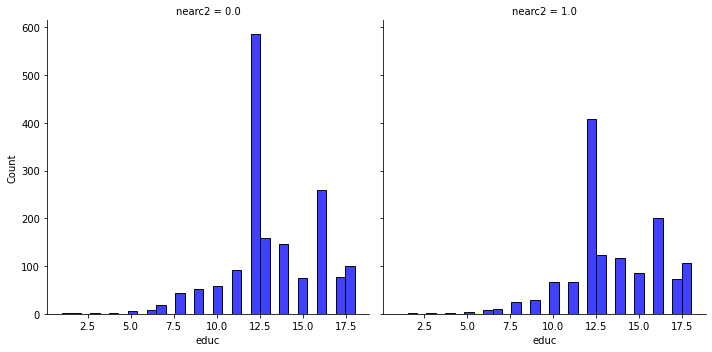

In [33]:
sns.displot(card, x="educ", col = "nearc2", color="blue")


Como se puede evidenciar en los graficos, existen dos grupos: los estudiantes quienes cuentan con un centro educativo cercano por 4 años (grupo de tratamiento) y quienes no (grupo de control). La gran diferencia que se encuentra es en el grupo de 12 años, en donde ademas se empieza a aumentar la cantidad de personas que acceden a educacion.


## Grafique dos histogramas para la variable logaritmos de los ingresos lwage para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

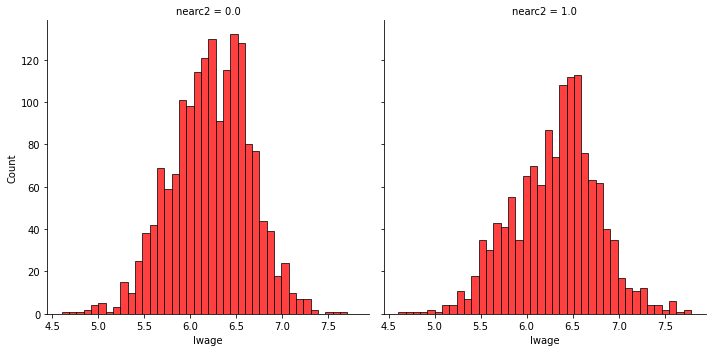

In [34]:
sns.displot(card, x="lwage", col = "nearc2", color="red")

En estos gráficos se puede ver con mucho mas claridad la diferencia entre ambos grupos, indicandonos que los estudiantes que viven cerca de una universidad perciben mas ingresos y los salarios aumentan aproximadamente el doble. En este sentido, siguiendo lo planteado anteriormente, esta diferencia puede deberse a que aquellos estudiantes que no viven cerca a una universidad no pueden concluir sus estudios por problemas como los gastos mencionados como vivienda, transporte, alimentacion, etc o incluso debido a situaciones emocionales como estres al estar expuesto a la carga academica y economica a la vez.
 


# Regresiones: 

## Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [28]:

ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        22:28:37   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretación: 

Considerando que todas las variables tienen un p-valor menor a 0.05 y que son significativas, se puede concluir lo siguiente:

- Por cada año adicional de educación, se espera que el nivel de ingreso aumente en 0.071 unidades logaritmicas. En otras palabras, por cada año adicional de educación, aumenta el ingreso de los encuestados en un 7.1%.
- Por cada año adicional de experiencia laboral, se espera que el nivel de ingresos aumente en 0.03 unidades logaritimicas.
- De tratarse de una persona afroamericana, se espera que el nivel de ingresos disminuya en 0.16 unidades logaritmicas .
- De tratarse de una persona que vive en el sur, se espera que el nivel de ingresos disminuya en 0.13 unidades logarítmicas.
- De tratarse de una persona casada, se espera que el nivel de ingresos disminuya en 0.03 unidades logarítimas.
- De tratarse de una persona que vive en SMSA, se espera que el nivel de ingresos aumente en 0.17 unidades logarítmicas.

## Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2. Compare los resultados encontrados usando IV2SLS con la primera regresión. ¿Cambió el coeficiente relacionado a educ? ¿por qué?

In [29]:
card['married'] = card['married'].fillna(0)  #There are null values in the dataset, we will fill them with 0


In [30]:
iv_reg = IV2SLS.from_formula("lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        22:29:28   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

### Interpretación: 

En el segundo modelo se ha instrumentalizado la regresión lineal con las variables años de educación junto con la cercanía de institutos educativos superiores de 2 años. Como se observa, no todas las variables son significativas, a excepción de la variable años de experiencia. 

Asimismo, el modelo presenta un r ajustado negativo que señala que es neutral frente a la introducción de variable adicionales. Asimismo, el F statistic excede 15, lo cual sugiere que no tenemos un problema de instrumento débil.

## Comparación: 

En general, por cada año adicional de estudios, los ingresos de los estudiantes aumenta aproximadamente un 36%. De acuerdo a esto, podemos decir que encontramos un mayor aumento del ingreso en este modelo en comparación con el OSL anterior.  Por otra parte, con respecto a la instrumentalización de variables, se observa que el coeficiente de la variable educación es mucho mayor que el encontrado en la regresión lineal: alrededor de un 75% mayor. Asimismo, dado que el F-statistic excede a 15, no se advierte un problema de instrumento débil. De esta manera, el rendimiento de la educación asociado con esta estimación 2SLS es 0,127; es decir, por cada año adicional de educación se espera que los ingresos aumenten en un 12,7%.

En suma, el cambio de coeficiente de la variable años de educación (educ) está relacionado con la introducción e instrumentalización de la variable instituto educativo superior de 2 años (nearc2) presente en el modelo. Se confirma entonces que la presencia de universidades o institutos superiores cerca al lugar de residencia si juegan un papel importante en la continuación de los estudios.